# **Question: 1**

Q1. Apply Data Wrangling techniques to get refined data version that derive information.

In [37]:
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv("/content/data_for_exam.xlsx - Sheet1.csv")
df.head()

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 99 non-null     object
 1   Product                       99 non-null     object
 2   Sub-product                   86 non-null     object
 3   Consumer complaint narrative  16 non-null     object
 4   Company public response       33 non-null     object
 5   Company                       99 non-null     object
 6   State                         98 non-null     object
 7   ZIP code                      89 non-null     object
 8   Submitted via                 99 non-null     object
 9   Company response to consumer  99 non-null     object
 10  Timely response?              99 non-null     object
 11  Consumer disputed?            75 non-null     object
dtypes: object(12)
memory usage: 9.4+ KB


In [40]:
df.columns

Index(['Date received', 'Product', 'Sub-product',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')

In [53]:
# Clean column names by removing special characters and spaces
cleaned_column_names = [col.strip().replace("@", "").replace("_", "") for col in df.columns]
df.columns = cleaned_column_names

# Print cleaned column names
print("Cleaned Column Names:")
print(cleaned_column_names)
print("\n")

# Print original column names
print("Original Column Names:")
print(df.columns)

Cleaned Column Names:
['Date received', 'Product', 'Sub-product', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Submitted via', 'Company response to consumer', 'Timely response?', 'Consumer disputed?']


Original Column Names:
Index(['Date received', 'Product', 'Sub-product',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')


In [56]:
# Data Wrangling

columns_to_drop = ["Consumer complaint narrative", "Company public response", "ZIP code"]
df_cleaned = df.drop(columns=columns_to_drop)

In [58]:
# Fill missing values

df_cleaned["Sub-product"].fillna("Unknown", inplace=True)
df_cleaned["State"].fillna("Unknown", inplace=True)
df_cleaned["Consumer disputed?"].fillna("Not specified", inplace=True)

In [59]:
# Display the first few rows of the cleaned and preprocessed DataFrame

print("Cleaned and Preprocessed Data:")
print(df_cleaned.head())

Cleaned and Preprocessed Data:
  Date received                      Product  \
0     3/12/2014                     Mortgage   
1     1/19/2017                 Student loan   
2      4/6/2018  Credit card or prepaid card   
3      6/8/2014                  Credit card   
4     9/13/2014              Debt collection   

                                  Sub-product  \
0                              Other mortgage   
1              Federal student loan servicing   
2  General-purpose credit card or charge card   
3                                     Unknown   
4                                 Credit card   

                             Company State Submitted via  \
0               M&T BANK CORPORATION    MI      Referral   
1            Navient Solutions, LLC.    LA           Web   
2  CAPITAL ONE FINANCIAL CORPORATION    VA           Web   
3           AMERICAN EXPRESS COMPANY    ID           Web   
4                     CITIBANK, N.A.    VA           Web   

  Company response to co

# **Question: 2**

Q2. Perform EDA (Exploratory Data Analysis) and identify any 5 business problems and suggest machine learning methodology to improve consumer dispute rate.

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic statistics and information
print("Summary Statistics:")
print(df_cleaned.describe())
print("\n")

Summary Statistics:
       Date received   Product     Sub-product  \
count             99        99              99   
unique            91        11              26   
top        8/28/2018  Mortgage  Other mortgage   
freq               3        36              13   

                                    Company State Submitted via  \
count                                    99    99            99   
unique                                   55    35             5   
top     Experian Information Solutions Inc.    CA           Web   
freq                                     11    15            72   

       Company response to consumer Timely response? Consumer disputed?  
count                            99               99                 99  
unique                            6                1                  3  
top         Closed with explanation              Yes                 No  
freq                             82               99                 56  




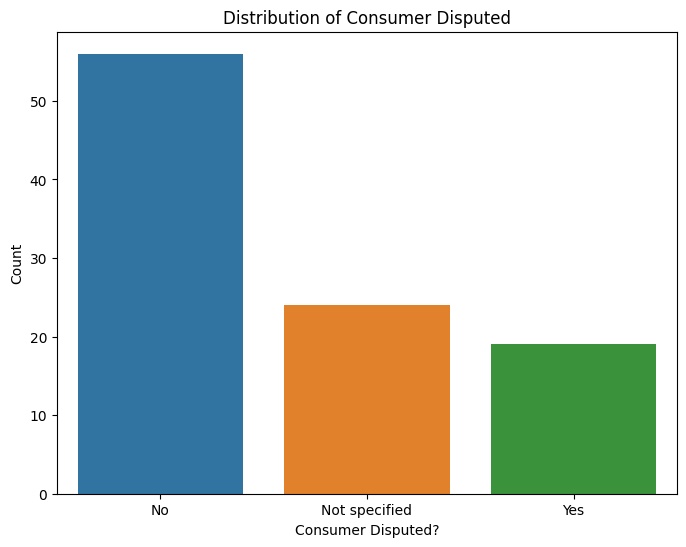

In [129]:
# Explore the distribution of 'Consumer disputed?' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Consumer disputed?')
plt.title("Distribution of Consumer Disputed")
plt.xlabel("Consumer Disputed?")
plt.ylabel("Count")
plt.show()


**1. Business Problem:** Imbalanced Consumer Dispute Distribution

The distribution of 'Consumer disputed?' column suggests an imbalance in the data with a higher count of 'No' disputes compared to 'Yes' disputes. This imbalance may lead to challenges when building a predictive model to accurately predict consumer disputes.

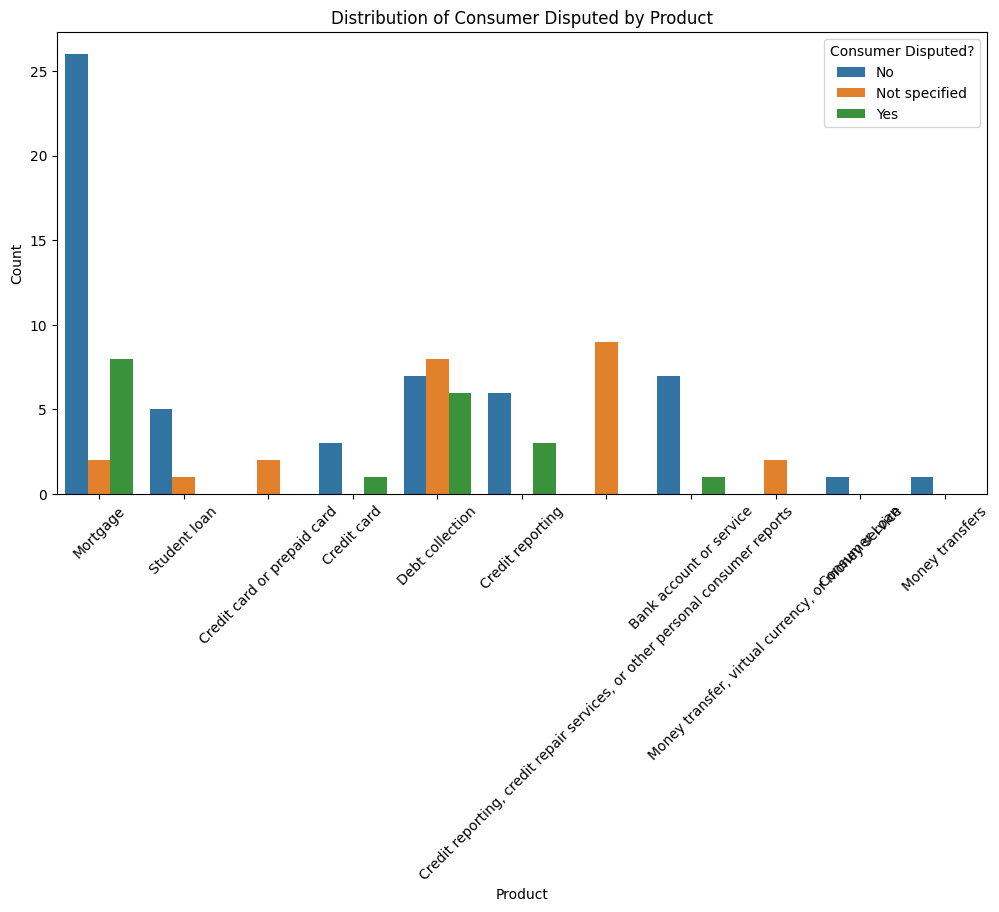

In [125]:
# Visualize the distribution of products

plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Product', hue='Consumer disputed?')
plt.title("Distribution of Consumer Disputed by Product")
plt.xlabel("Product")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Consumer Disputed?")
plt.show()

**2. Business Problem:** Variation in Dispute Rates Across Products

The distribution of consumer disputes by product reveals that certain products have a higher proportion of disputes compared to others. This variation may stem from product-specific issues or service quality disparities, indicating a need for further investigation and potentially tailored strategies for improving dispute rates.

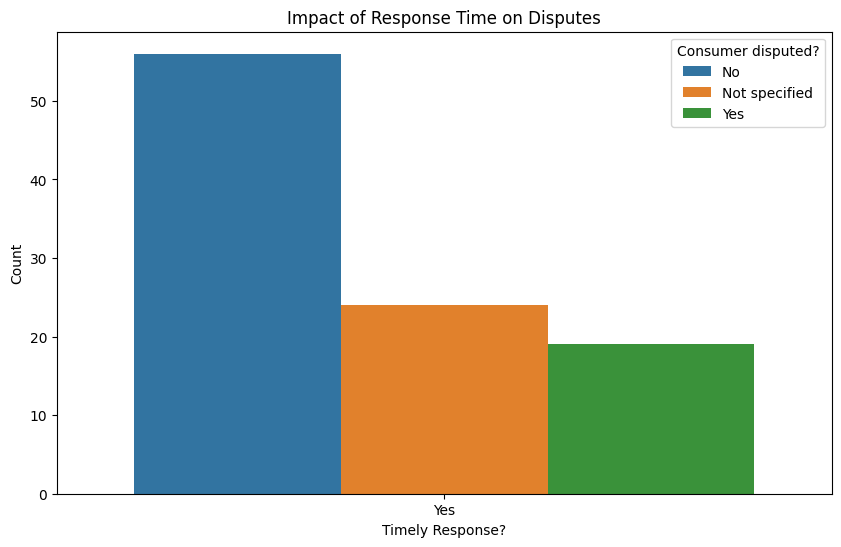

In [126]:
# Visualize the impact of response time on disputes

plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Timely response?', hue='Consumer disputed?')
plt.title("Impact of Response Time on Disputes")
plt.xlabel("Timely Response?")
plt.ylabel("Count")
# plt.legend(title="Consumer Disputed?")
plt.show()

**3. Business Problem:** Timely Response and Consumer Dispute Rates

The visualization demonstrates the relationship between timely response and consumer dispute rates. It appears that disputes are relatively higher when the response is not timely. This indicates a potential business problem in managing response times, as it may influence the likelihood of consumers disputing claims. Addressing response time inefficiencies could lead to better consumer satisfaction and potentially lower dispute rates.

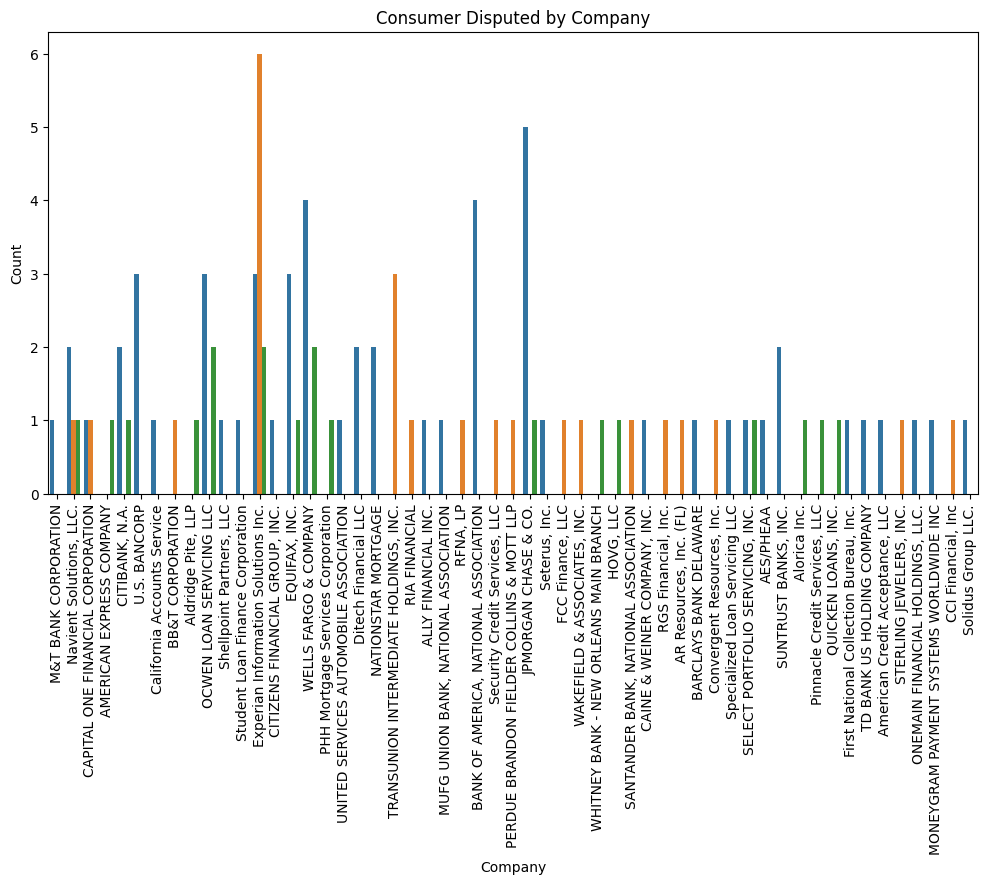

In [127]:
# Visualize company-wise dispute rates

plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Company', hue='Consumer disputed?')
plt.title("Consumer Disputed by Company")
plt.xlabel("Company")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend().remove()
plt.show()

**4. Business Problem:**
Variability in Company Dispute Rates

The visualization highlights the differences in dispute rates among various companies. Some companies appear to have higher dispute rates compared to others. This variation could stem from differences in customer service quality, product offerings, or response efficiency. Identifying the underlying factors contributing to these disparities is crucial for improving dispute resolution and overall customer satisfaction.

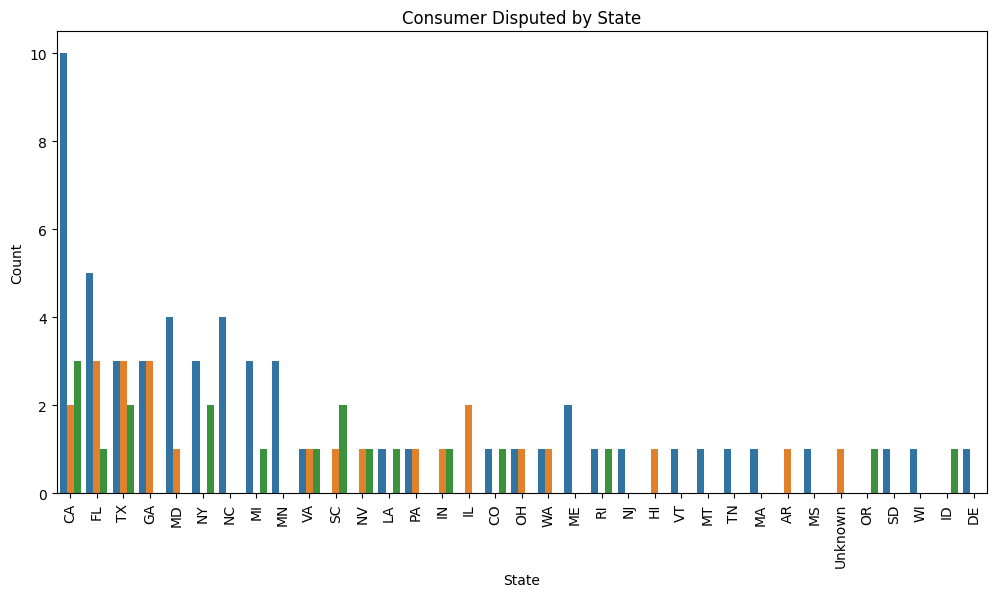

In [128]:
# Visualize dispute rates across states

plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='State', hue='Consumer disputed?', order=df_cleaned['State'].value_counts().index)
plt.title("Consumer Disputed by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=90)
# Remove the legend for clarity
plt.legend().remove()
plt.show()

**5. Business Problem:** Dispute Rates Variation Across States

The visualization illustrates the variation in consumer dispute rates across different states. Certain states show higher dispute counts compared to others. This variation in dispute rates may be influenced by factors such as consumer protection regulations, company operations and customer satisfaction. Understanding the reasons behind state-specific discrepancies is essential for addressing regional disparities and improving overall dispute resolution processes.


# **Question: 3**


Q3. Using the suggested ML approach in Question 2,

a. Design at least 3 machine learning models/algorithms with justification.

b. Choose the best model for each problem based on the evaluation metric you find the most relevant.

c. Identify the feature to gauge consumer sentiment and perform sentiment analysis that may lead to 'Consumer disputed?